In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


In [18]:
api = pd.read_csv("C:\\Users\\JSLV3\\Documents\\datos_descargados.csv")
api.head()


,fecha_terminacion_proyecto,fecha_de_corte,c_digo_divipola_departamento,departamento,c_digo_divipola_municipio,municipio,indicador,nombre_proyecto,origen,aporte_nacion,contrapartida,estado_seguimiento
0,2018-12-31T00:00:00.000,2024-04-04T00:00:00.000,18,CAQUETA,"18029, 18205, 18610","Albania(CAQ), Curillo(CAQ), San Jose De Fragua...",Nueva Población Beneficiada Acueducto Urbano,CONSTRUCCION SISTEMA DE ACUEDUCTO REGIONAL PAR...,PDA,12110573518,953340488,En Liquidación
1,2018-10-16T00:00:00.000,2024-04-04T00:00:00.000,15,BOYACA,15693,Santa Rosa De Viterbo(BOY),Nueva Población Beneficiada Acueducto Urbano,"CONSTRUCCION RED DE CONDUCCION, REDES DE DISTR...",PDA,557345219,2236932650,En Liquidación
2,2018-10-08T00:00:00.000,2024-04-04T00:00:00.000,17,CALDAS,17050,Aranzazu(CAL),Nueva Población Beneficiada Alcantarillado Urbano,OPTIMIZACION SISTEMAS DE ACUEDUCTO Y ALCANTARI...,PDA,491820256,664819896,Terminado
3,2019-06-01T00:00:00.000,2024-04-04T00:00:00.000,17,CALDAS,17446,Marulanda(CAL),Nueva Población Beneficiada Acueducto Rural,MEJORAMIENTO SISTEMA DE ACUEDUCTO EN EL CORREG...,PDA,286128295,540512429,Terminado
4,2019-02-12T00:00:00.000,2024-04-04T00:00:00.000,5,ANTIOQUIA,5250,El Bagre(ANT),Nueva Población Beneficiada Acueducto Urbano,CONSTRUCCION DEL PLAN MAESTRO DE ACUEDUCTO URB...,PDA,0,4773790842,Liquidado


In [19]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   fecha_terminacion_proyecto    268 non-null    object
 1   fecha_de_corte                268 non-null    object
 2   c_digo_divipola_departamento  268 non-null    int64 
 3   departamento                  268 non-null    object
 4   c_digo_divipola_municipio     268 non-null    object
 5   municipio                     268 non-null    object
 6   indicador                     268 non-null    object
 7   nombre_proyecto               268 non-null    object
 8   origen                        268 non-null    object
 9   aporte_nacion                 268 non-null    int64 
 10  contrapartida                 268 non-null    int64 
 11  estado_seguimiento            268 non-null    object
dtypes: int64(3), object(9)
memory usage: 25.3+ KB


In [20]:
api.describe(include='all')


,fecha_terminacion_proyecto,fecha_de_corte,c_digo_divipola_departamento,departamento,c_digo_divipola_municipio,municipio,indicador,nombre_proyecto,origen,aporte_nacion,contrapartida,estado_seguimiento
count,268,268,268.000000,268,268,268,268,268,268,2.680000e+02,2.680000e+02,268
unique,222,1,NaN,29,194,193,4,248,11,NaN,NaN,4
top,2018-12-31T00:00:00.000,2024-04-04T00:00:00.000,NaN,NARIÑO,44430,Maicao(LA ),Nueva Población Beneficiada Alcantarillado Urbano,CONSTRUCCIÓN DE CONEXIONES INTRADOMICILIARIAS ...,PDA,NaN,NaN,Terminado
freq,7,268,NaN,30,6,6,98,4,141,NaN,NaN,102
mean,NaN,NaN,43.298507,NaN,NaN,NaN,NaN,NaN,NaN,2.759527e+09,2.829967e+09,NaN
std,NaN,NaN,24.237443,NaN,NaN,NaN,NaN,NaN,NaN,6.160276e+09,4.588786e+09,NaN
min,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.800891e+08,1.277241e+09,NaN
75%,NaN,NaN,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.302808e+09,3.914618e+09,NaN


•	Fecha de terminación del proyecto: Las fechas varían desde el 8 de marzo de 2017 hasta el 27 de febrero de 2024, con una fecha media de terminación alrededor del 24 de diciembre de 2020.

•	Fecha de corte: Todas las observaciones tienen la misma fecha de corte, el 4 de abril de 2024.

•	Código DIVIPOLA del departamento: Hay 29 categorías únicas, con Nariño teniendo la mayor frecuencia (30 veces).

•	Municipio: Hay 193 municipios únicos mencionados, con 'Maicao (La Guajira)' apareciendo más frecuentemente (6 veces).

•	Indicador: Hay 4 indicadores diferentes de beneficios proporcionados por los proyectos. El más común es "Nueva Población Beneficiada Alcantarillado Urbano" (98 veces).

•	Nombre del proyecto: Hay 248 nombres de proyectos únicos, con el nombre más común siendo sobre construcción de conexiones intradomiciliarias, apareciendo 4 veces.

•	Origen: Hay 11 orígenes diferentes de financiamiento, con PDA siendo el más frecuente (141 veces).

•	Aporte de la nación y contrapartida: Estos campos son numéricos con valores que varían ampliamente, reflejando la diversidad de escala y tipo de financiamiento de los proyectos.

•	Estado de seguimiento: Los proyectos tienen uno de cuatro estados de seguimiento, siendo "Terminado" el más común (102 veces).


Conversión de Fechas

In [21]:
api['fecha_terminacion_proyecto'] = pd.to_datetime(api['fecha_terminacion_proyecto'])
api['fecha_de_corte'] = pd.to_datetime(api['fecha_de_corte'])

Las columnas fecha_terminacion_proyecto y fecha_de_corte estaban originalmente en formato de texto (string), lo cual no es óptimo para realizar operaciones relacionadas con fechas y tiempos, así que, convertimos estas columnas al tipo datetime.

Normalización de Textos en Columnas Categóricas

In [22]:
str_cols = api.select_dtypes(include=['object']).columns

api[str_cols] = api[str_cols].apply(lambda x: x.str.lower().str.strip())

Las discrepancias en el formato de texto, como las diferencias entre mayúsculas y minúsculas o la presencia de espacios en blanco adicionales, pueden crear categorías artificiales que distorsionan el análisis. Por ejemplo, "CALDAS", "Caldas" y " caldas " se tratarían como tres categorías separadas cuando, en realidad, representan la misma entidad.
Para abordar estos problemas y garantizar la consistencia en el análisis, realizamos la siguiente normalización en todas las columnas de texto:

1.	Convertimos todas las cadenas de texto a minúsculas, asegurando que la capitalización no cree duplicados artificiales.

2.	Eliminamos los espacios en blanco al principio y al final de las cadenas, evitando discrepancias debidas a errores de formato o tipografía.


Verificación de Valores Nulos

In [23]:
api.isnull().sum()

fecha_terminacion_proyecto      0
fecha_de_corte                  0
c_digo_divipola_departamento    0
departamento                    0
c_digo_divipola_municipio       0
municipio                       0
indicador                       0
nombre_proyecto                 0
origen                          0
aporte_nacion                   0
contrapartida                   0
estado_seguimiento              0
dtype: int64

Los resultados confirman que no hay ausencia de datos en ninguna parte del conjunto de datos.

 Filas Duplicadas

In [24]:
api.duplicated().sum()

0

El resultado de esta operación es cero, lo que indica que no hay filas duplicadas en nuestro conjunto de datos.

Análisis de la Distribución de Proyectos por Municipios:

In [25]:
api['num_municipios'] = api['c_digo_divipola_municipio'].apply(lambda x: len(x.split(',')))


La nueva columna num_municipios fue creada para cuantificar el alcance de cada proyecto en términos del número de municipios afectados. En el dataset original, la columna c_digo_divipola_municipio contenía listas de códigos de municipios, indicando que algunos proyectos tienen influencia sobre múltiples localidades. Sin embargo, esta información estaba condensada en una sola cadena de texto, lo cual dificulta realizar análisis estadísticos o comparativos sobre ella.

Agrupación de Proyectos por Región Geográfica

In [26]:
region_mapping = {
    'CHOCO': 'Región Pacífica',
    'CAUCA': 'Región Pacífica',
    'NARIÑO': 'Región Pacífica',
    'VALLE DEL CAUCA': 'Región Pacífica',
    'ARAUCA': 'Región Orinoquía',
    'CASANARE': 'Región Orinoquía',
    'GUAINÍA': 'Región Orinoquía',
    'GUAVIARE': 'Región Orinoquía',
    'META': 'Región Orinoquía',
    'VICHADA': 'Región Orinoquía',
    'AMAZONAS': 'Región Amazonía',
    'CAQUETA': 'Región Amazonía',
    'PUTUMAYO': 'Región Amazonía',
    'VAUPES': 'Región Amazonía',
    'ANTIOQUIA': 'Región Andina',
    'BOYACA': 'Región Andina',
    'CALDAS': 'Región Andina',
    'CUNDINAMARCA': 'Región Andina',
    'HUILA': 'Región Andina',
    'NORTE DE SANTANDER': 'Región Andina',
    'QUINDIO': 'Región Andina',
    'RISARALDA': 'Región Andina',
    'SANTANDER': 'Región Andina',
    'TOLIMA': 'Región Andina',
    'SAN ANDRES Y PROVIDENCIA': 'Región Insular',
    'ATLANTICO': 'Región Caribe',
    'BOLIVAR': 'Región Caribe',
    'CESAR': 'Región Caribe',
    'CORDOBA': 'Región Caribe',
    'LA GUAJIRA': 'Región Caribe',
    'MAGDALENA': 'Región Caribe',
    'SUCRE': 'Región Caribe'
}

# Corrección de nombres en el dataset
api['departamento'] = api['departamento'].replace({
    'SAN ANDRES': 'SAN ANDRES Y PROVIDENCIA',
    'N DE SANTANDER': 'NORTE DE SANTANDER'
})

# Aplicación del mapeo para crear la columna de región
api['región'] = api['departamento'].str.upper().map(region_mapping)

# Manejo de posibles valores no mapeados
api['región'] = api['región'].fillna('Región Desconocida')

# Mostrar el mapeo aplicado
api[['departamento', 'región']]



,departamento,región
0,caqueta,Región Amazonía
1,boyaca,Región Andina
2,caldas,Región Andina
3,caldas,Región Andina
4,antioquia,Región Andina
...,...,...
263,santander,Región Andina
264,boyaca,Región Andina
265,casanare,Región Orinoquía
266,risaralda,Región Andina


La columna creada "región", representa una clasificación estratégica de los departamentos en regiones geográficas más amplias. El propósito de esta agrupación es simplificar el análisis de los datos y permitir una interpretación más clara de las tendencias y patrones a un nivel regional, en lugar de hacerlo por departamentos individuales, que son más numerosos y podrían conducir a un análisis más fragmentado y complejo.

Distribución de Proyectos por Región Geográfica en Colombia

C:\Users\JSLV3\AppData\Local\Temp\ipykernel_21160\406557688.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proyectos_por_region.index, y=proyectos_por_region.values, palette="viridis")


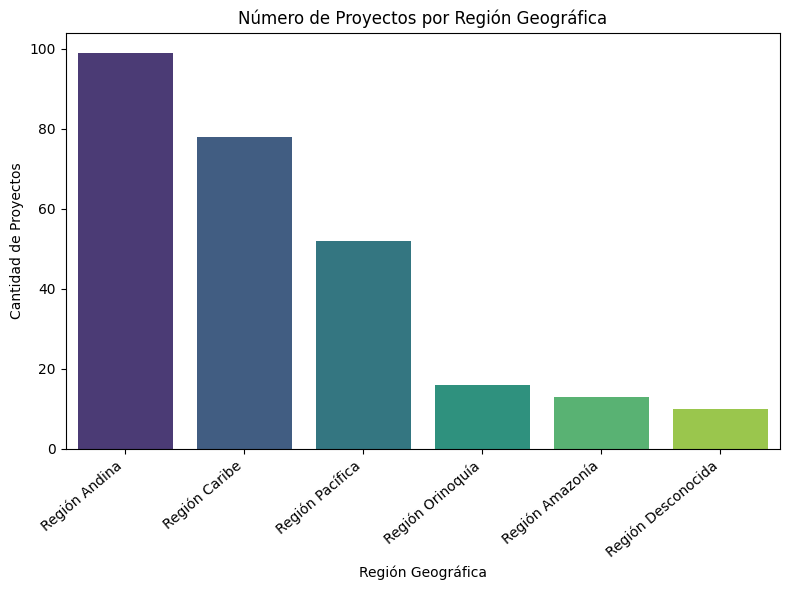

In [27]:
proyectos_por_region = api['región'].value_counts()

# Configuración del gráfico
plt.figure(figsize=(8, 6))

sns.barplot(x=proyectos_por_region.index, y=proyectos_por_region.values, palette="viridis")

plt.title('Número de Proyectos por Región Geográfica')
plt.xlabel('Región Geográfica')
plt.ylabel('Cantidad de Proyectos')

plt.xticks(rotation=40, ha='right')

plt.tight_layout()
plt.show()


Este gráfico de barras ilustra la distribución de una serie de proyectos de infraestructura y desarrollo entre las diversas regiones geográficas de Colombia. La Región Andina lidera con la mayor cantidad de proyectos, lo cual refleja su densidad poblacional y su importancia económica para el país. La Región Caribe sigue en segundo lugar, destacando su papel significativo en el desarrollo regional. Las regiones Pacífica, Orinoquía y Amazonía muestran un menor número de proyectos, lo que puede estar relacionado con factores como la accesibilidad, la población y la economía regional. 

Estado de Avance de los Proyectos de Infraestructura en Colombia

C:\Users\JSLV3\AppData\Local\Temp\ipykernel_21160\3663969950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estado_seguimiento_counts.index, y=estado_seguimiento_counts.values, palette="coolwarm")


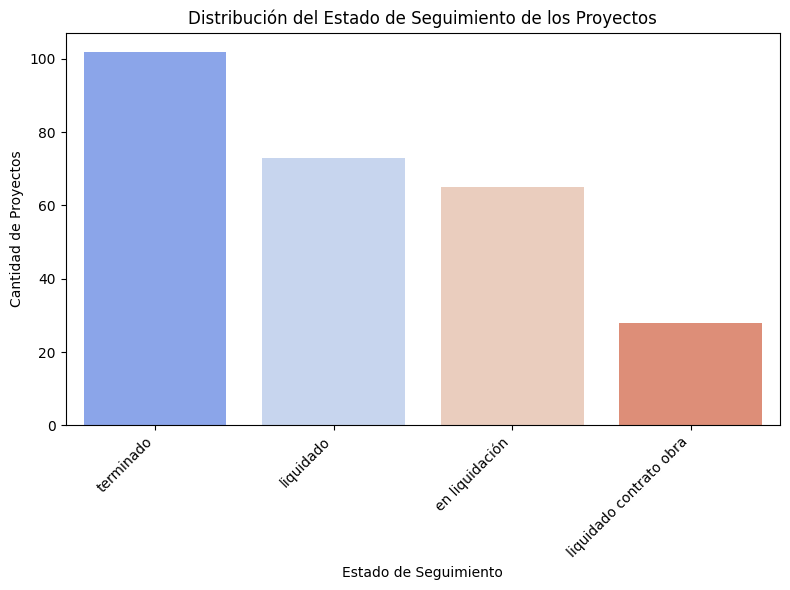

In [16]:
estado_seguimiento_counts = api['estado_seguimiento'].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x=estado_seguimiento_counts.index, y=estado_seguimiento_counts.values, palette="coolwarm")

plt.title('Distribución del Estado de Seguimiento de los Proyectos')
plt.xlabel('Estado de Seguimiento')
plt.ylabel('Cantidad de Proyectos')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

La visualización presenta un conteo de los proyectos de infraestructura clasificados según su estado actual de seguimiento en Colombia. Los estados mostrados incluyen "Terminado", "Liquidado", "En Liquidación" y "Liquidado Contrato Obra". Este desglose es esencial para evaluar la eficacia y la velocidad del desarrollo de la infraestructura a lo largo del país.

La barra más alta corresponde a los proyectos "Terminados", lo cual es un indicativo positivo de que muchos proyectos han alcanzado su conclusión satisfactoriamente. La siguiente categoría con mayor cantidad es "Liquidado", sugiriendo que un número significativo de proyectos ha pasado por el proceso de cierre formal y están contablemente completos. "En Liquidación" representa aquellos proyectos que están en proceso de ser cerrados, mientras que "Liquidado Contrato Obra" podría referirse a proyectos que han completado la fase de construcción y están en fases finales administrativas.

Estado de avance de los proyectos por Región

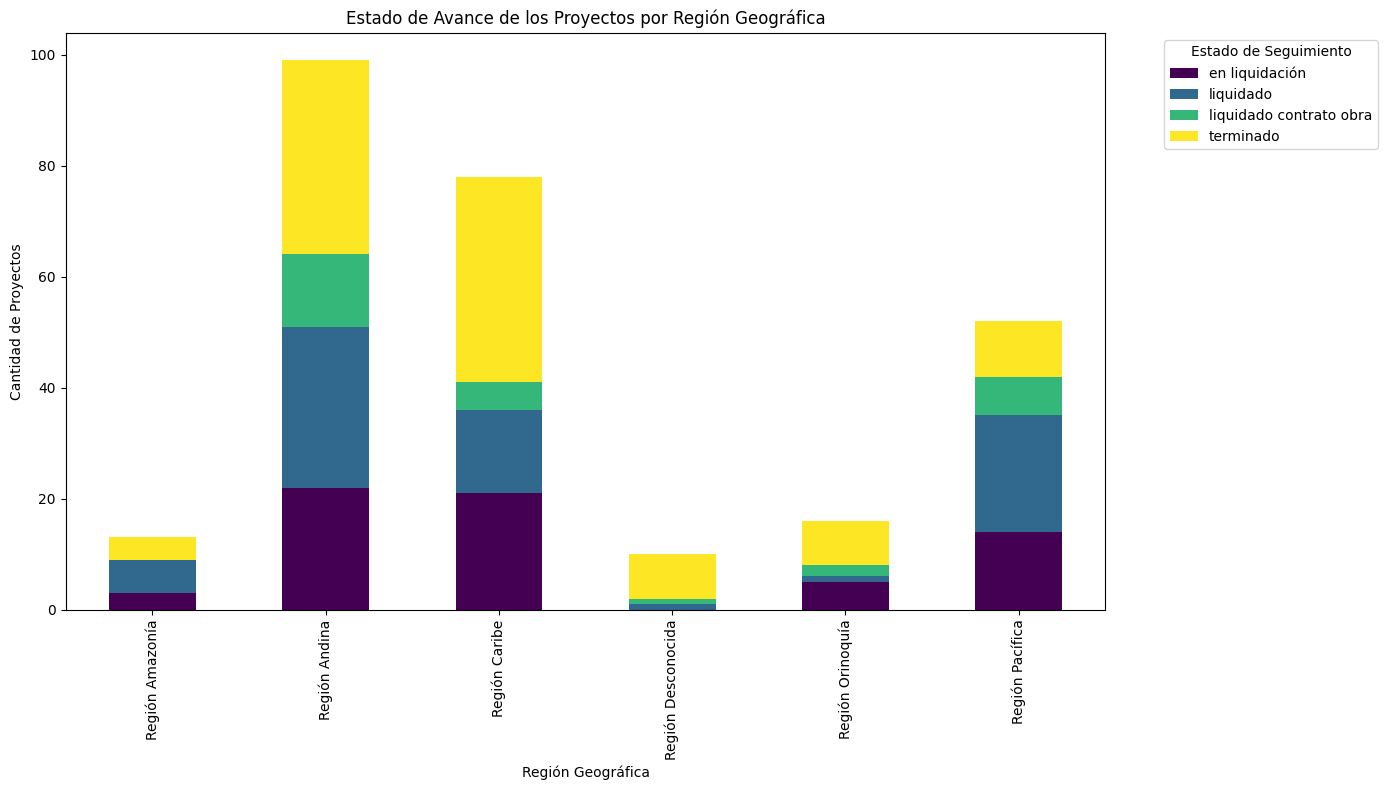

In [17]:
pivot_data = api.pivot_table(index='región', columns='estado_seguimiento', aggfunc='size', fill_value=0)

pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Estado de Avance de los Proyectos por Región Geográfica')
plt.xlabel('Región Geográfica')
plt.ylabel('Cantidad de Proyectos')
plt.legend(title='Estado de Seguimiento', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

•	Región Andina: Presenta la mayor cantidad de proyectos en todos los estados de seguimiento, lo cual es consistente con ser una región densamente poblada y económicamente activa.

•	Región Caribe: Sigue en número de proyectos, pero con una notable cantidad de proyectos "terminados", señalando una alta tasa de finalización.

•	Región Pacífica: Aunque tiene menos proyectos en comparación con las regiones Andina y Caribe, hay un balance significativo entre proyectos "terminados" y aquellos aún en fases de cierre financiero y administrativo.

•	Regiones Orinoquía y Amazonía: Muestran volúmenes menores de proyectos, reflejando posiblemente desafíos logísticos o de priorización en estas áreas más remotas. La presencia de proyectos "liquidado contrato obra" indica proyectos que han completado la fase constructiva.


In [28]:
api.to_csv('api_done.csv', index=False)
print(api.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fecha_terminacion_proyecto    268 non-null    datetime64[ns]
 1   fecha_de_corte                268 non-null    datetime64[ns]
 2   c_digo_divipola_departamento  268 non-null    int64         
 3   departamento                  268 non-null    object        
 4   c_digo_divipola_municipio     268 non-null    object        
 5   municipio                     268 non-null    object        
 6   indicador                     268 non-null    object        
 7   nombre_proyecto               268 non-null    object        
 8   origen                        268 non-null    object        
 9   aporte_nacion                 268 non-null    int64         
 10  contrapartida                 268 non-null    int64         
 11  estado_seguimiento            26